# Water

Data source: https://data.apps.fao.org/aquastat

Direct link: https://www.fao.org/aquastat/data/AQUASTAT%20Statistics%20Bulk%20Download%20(English).zip

Date: 2025-03-17

Exploring world water data, see what insights present themselves.

In [1]:
import gc

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.core.interactiveshell import InteractiveShell

InteractiveShell.ast_node_interactivity = 'all'

In [2]:
data = pd.read_csv(filepath_or_buffer=".data/Water_2025-03-17.csv.xz", index_col=0, compression="xz")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 830909 entries, 0 to 830908
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Country             830909 non-null  object 
 1   M49                 830909 non-null  int64  
 2   Variable            830909 non-null  object 
 3   Year                830909 non-null  int64  
 4   Unit                0 non-null       float64
 5   Symbol              688245 non-null  object 
 6   Symbol Description  830909 non-null  object 
 7   Value               830909 non-null  float64
dtypes: float64(2), int64(2), object(4)
memory usage: 57.1+ MB


In [4]:
data.columns

Index(['Country', 'M49', 'Variable', 'Year', 'Unit', 'Symbol',
       'Symbol Description', 'Value'],
      dtype='object')

In [5]:
data.head()
data.tail()

,Country,M49,Variable,Year,Unit,Symbol,Symbol Description,Value
0,Philippines,608,Exploitable: regular renewable groundwater,1999,NaN,I,"Imputed (carry forward, vertical imputation, l...",20.200000
1,Seychelles,690,Total dam capacity,1999,NaN,I,"Imputed (carry forward, vertical imputation, l...",0.001000
2,Malta,470,Total dam capacity,1999,NaN,I,"Imputed (carry forward, vertical imputation, l...",0.000000
3,China,156,Agricultural water withdrawal,1999,NaN,I,"Imputed (carry forward, vertical imputation, l...",382.585714
4,Congo,178,Agricultural water withdrawal,1999,NaN,I,"Imputed (carry forward, vertical imputation, l...",0.004031


,Country,M49,Variable,Year,Unit,Symbol,Symbol Description,Value
830904,Latvia,428,% of the area equipped for irrigation managed ...,2010,NaN,NaN,"Official value, data come from one national so...",16.670
830905,Latvia,428,% of the agricultural holdings with irrigation...,2010,NaN,NaN,"Official value, data come from one national so...",23.810
830906,Montenegro,499,% of the agricultural holdings with irrigation...,2010,NaN,NaN,"Official value, data come from one national so...",7.651
830907,United Kingdom of Great Britain and Northern I...,826,% of the agricultural holdings with irrigation...,2010,NaN,NaN,"Official value, data come from one national so...",2.463
830908,Sweden,752,% of the agricultural holdings with irrigation...,2010,NaN,NaN,"Official value, data come from one national so...",2.795


In [6]:
COUNTRY = "Kenya"

In [7]:
country = data.query(expr=f"Country == '{COUNTRY}'")

In [8]:
country.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5002 entries, 60 to 830879
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Country             5002 non-null   object 
 1   M49                 5002 non-null   int64  
 2   Variable            5002 non-null   object 
 3   Year                5002 non-null   int64  
 4   Unit                0 non-null      float64
 5   Symbol              4258 non-null   object 
 6   Symbol Description  5002 non-null   object 
 7   Value               5002 non-null   float64
dtypes: float64(2), int64(2), object(4)
memory usage: 351.7+ KB


In [9]:
country

,Country,M49,Variable,Year,Unit,Symbol,Symbol Description,Value
60,Kenya,404,Municipal water withdrawal,1999,NaN,I,"Imputed (carry forward, vertical imputation, l...",0.449385
232,Kenya,404,Area equipped for full control irrigation: sur...,1999,NaN,I,"Imputed (carry forward, vertical imputation, l...",41.180000
413,Kenya,404,Area equipped for irrigation by surface water,1999,NaN,I,"Imputed (carry forward, vertical imputation, l...",91.136667
545,Kenya,404,Harvested irrigated temporary crop area: Veget...,1999,NaN,I,"Imputed (carry forward, vertical imputation, l...",29.587692
579,Kenya,404,Harvested irrigated permanent crop area: Other...,1999,NaN,I,"Imputed (carry forward, vertical imputation, l...",0.030000
...,...,...,...,...,...,...,...,...
830640,Kenya,404,Groundwater: entering the country (total),2010,NaN,NaN,"Official value, data come from one national so...",0.000000
830656,Kenya,404,Groundwater: leaving the country to other coun...,2010,NaN,NaN,"Official value, data come from one national so...",0.000000
830779,Kenya,404,Area equipped for irrigation: spate irrigation,2010,NaN,NaN,"Official value, data come from one national so...",6.470000
830860,Kenya,404,Water withdrawal for livestock (watering and c...,2010,NaN,NaN,"Official value, data come from one national so...",0.255000


How many NaN?

In [10]:
country.isna().sum()

Country                  0
M49                      0
Variable                 0
Year                     0
Unit                  5002
Symbol                 744
Symbol Description       0
Value                    0
dtype: int64

In [11]:
print(f"Unit is 100% empty, and Symbol is {((744/5002) * 100):.2f}% empty. Hmmmm ...")

Unit is 100% empty, and Symbol is 14.87% empty. Hmmmm ...


In [12]:
country = country[['Variable','Year','Symbol','Symbol Description','Value']].copy()

In [13]:
country.sample(n=5)

,Variable,Year,Symbol,Symbol Description,Value
326586,Surface water: inflow submitted to treaties,1996,E,Estimate either calculated as sum or identify ...,0.00000
550037,Urban population,1973,X,External value (reported by FAOSTAT or another...,1479.10100
805811,Municipal water withdrawal as % of total withd...,2013,E,Estimate either calculated as sum or identify ...,36.85519
387604,National Rainfall Index (NRI),1994,I,"Imputed (carry forward, vertical imputation, l...",967.46250
498519,Irrigation potential,2010,NaN,"Official value, data come from one national so...",353.00000


In [14]:
country["Symbol"].value_counts(dropna=False)

Symbol
E      1850
I      1363
X      1045
NaN     744
Name: count, dtype: int64

In [15]:
symbol_meaning = {symbol: set(country['Symbol Description'][country['Symbol'].isna() if pd.isna(symbol) else country['Symbol'] == symbol]) for symbol in country['Symbol'].unique()}
symbol_meaning

{'I': {'Imputed (carry forward, vertical imputation, linear interpolation)'},
 'X': {'External value (reported by FAOSTAT or another international agency)'},
 'E': {'Estimate either calculated as sum or identify (yield) from official values or from an AQUASTAT estimation'},
 nan: {'Official value, data come from one national source (FAO questionnaire on water and agriculture, report, publication, official website, etc.)'}}

Mmmmm ...

In [16]:
distilled = country.pivot(index="Year", columns="Variable").copy()
distilled.columns = distilled.columns.get_level_values(1)

In [17]:
distilled.info()

<class 'pandas.core.frame.DataFrame'>
Index: 55 entries, 1967 to 2021
Columns: 396 entries, % of agricultural GVA produced by irrigated agriculture to Water withdrawal for livestock (watering and cleaning)
dtypes: float64(132), object(264)
memory usage: 170.6+ KB


In [18]:
distilled.head()

Variable,% of agricultural GVA produced by irrigated agriculture,% of agricultural water managed area equipped for irrigation,% of area equipped for full control irrigation actually irrigated,% of area equipped for irrigation by direct use of non-treated municipal wastewater,% of area equipped for irrigation by groundwater,% of area equipped for irrigation by surface water,% of area equipped for irrigation power irrigated,% of area equipped for irrigation salinized,% of irrigation potential equipped for irrigation,% of the area equipped for irrigation actually irrigated,...,Total renewable water resources,Total renewable water resources per capita,Total water withdrawal,Total water withdrawal per capita,Treated municipal wastewater,Urban population,Urban population with access to safe drinking-water (JMP),Water resources: total external renewable,Water withdrawal for aquaculture,Water withdrawal for livestock (watering and cleaning)
Year,,,,,,,,,,,,,,,,,,,,,
1967,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,30.7,3009.488810,NaN,NaN,NaN,935.108,NaN,10.0,NaN,NaN
1968,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,30.7,2892.439775,NaN,NaN,NaN,1000.347,NaN,10.0,NaN,NaN
1969,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,30.7,2780.910202,NaN,NaN,NaN,1070.482,NaN,10.0,NaN,NaN
1970,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,30.7,2675.827351,NaN,NaN,NaN,1158.465,NaN,10.0,NaN,NaN
1971,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,30.7,2580.166487,NaN,NaN,NaN,1256.485,NaN,10.0,NaN,NaN


In [19]:
distilled = distilled.loc[:, distilled.notna().all()].copy()

In [20]:
distilled.info()

<class 'pandas.core.frame.DataFrame'>
Index: 55 entries, 1967 to 2021
Columns: 140 entries, % of total country area cultivated to Water resources: total external renewable
dtypes: float64(52), object(88)
memory usage: 60.6+ KB


In [21]:
distilled.head()

Variable,% of total country area cultivated,"Agriculture, value added (% GDP)","Agriculture, value added to GDP",Arable land area,Cultivated area (arable land + permanent crops),Dam capacity per capita,Dependency ratio,Environmental Flow Requirements,Gross Domestic Product (GDP),Groundwater: accounted outflow to other countries,...,Total exploitable water resources,Total internal renewable water resources (IRWR),Total internal renewable water resources per capita,Total population,Total renewable groundwater,Total renewable surface water,Total renewable water resources,Total renewable water resources per capita,Urban population,Water resources: total external renewable
Year,,,,,,,,,,,,,,,,,,,,,
1967,E,X,X,X,X,E,E,X,X,E,...,0.6,20.7,2029.199296,10201.068,3.5,30.2,30.7,3009.488810,935.108,10.0
1968,E,X,X,X,X,E,E,X,X,E,...,0.6,20.7,1950.276982,10613.877,3.5,30.2,30.7,2892.439775,1000.347,10.0
1969,E,X,X,X,X,E,E,X,X,E,...,0.6,20.7,1875.076260,11039.551,3.5,30.2,30.7,2780.910202,1070.482,10.0
1970,E,X,X,X,X,E,E,X,X,E,...,0.6,20.7,1804.222351,11473.087,3.5,30.2,30.7,2675.827351,1158.465,10.0
1971,E,X,X,X,X,E,E,X,X,E,...,0.6,20.7,1739.721377,11898.457,3.5,30.2,30.7,2580.166487,1256.485,10.0


In [22]:
distilled.isna().any().any()

np.False_

In [23]:
prime = distilled.select_dtypes(include='number').copy()

In [24]:
prime.info()

<class 'pandas.core.frame.DataFrame'>
Index: 55 entries, 1967 to 2021
Data columns (total 52 columns):
 #   Column                                                               Non-Null Count  Dtype  
---  ------                                                               --------------  -----  
 0   % of total country area cultivated                                   55 non-null     float64
 1   Agriculture, value added (% GDP)                                     55 non-null     float64
 2   Agriculture, value added to GDP                                      55 non-null     float64
 3   Arable land area                                                     55 non-null     float64
 4   Cultivated area (arable land + permanent crops)                      55 non-null     float64
 5   Dam capacity per capita                                              55 non-null     float64
 6   Dependency ratio                                                     55 non-null     float64
 7   Environmen

And we have complete data :)

Let the fun begin!

In [25]:
gc.collect()

20

Are there columns that have the same value for all rows?

In [26]:
static_dimensions = prime.loc[:, prime.nunique() == 1]

In [27]:
static_dimensions.info()

<class 'pandas.core.frame.DataFrame'>
Index: 55 entries, 1967 to 2021
Data columns (total 32 columns):
 #   Column                                                               Non-Null Count  Dtype  
---  ------                                                               --------------  -----  
 0   Dependency ratio                                                     55 non-null     float64
 1   Environmental Flow Requirements                                      55 non-null     float64
 2   Exploitable: regular renewable groundwater                           55 non-null     float64
 3   Groundwater produced internally                                      55 non-null     float64
 4   Groundwater: accounted inflow                                        55 non-null     float64
 5   Groundwater: accounted outflow to other countries                    55 non-null     float64
 6   Groundwater: entering the country (total)                            55 non-null     float64
 7   Groundwate

Let's remove them from the dataset for now. Figure out what to do with them later.

In [28]:
prime.drop(columns=prime.columns[prime.nunique() == 1], inplace=True)

In [29]:
prime.info()

<class 'pandas.core.frame.DataFrame'>
Index: 55 entries, 1967 to 2021
Data columns (total 20 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   % of total country area cultivated                   55 non-null     float64
 1   Agriculture, value added (% GDP)                     55 non-null     float64
 2   Agriculture, value added to GDP                      55 non-null     float64
 3   Arable land area                                     55 non-null     float64
 4   Cultivated area (arable land + permanent crops)      55 non-null     float64
 5   Dam capacity per capita                              55 non-null     float64
 6   Gross Domestic Product (GDP)                         55 non-null     float64
 7   Industry, value added to GDP                         55 non-null     float64
 8   Long-term average annual precipitation in depth      55 non-null     flo

In [30]:
prime.describe()

Variable,% of total country area cultivated,"Agriculture, value added (% GDP)","Agriculture, value added to GDP",Arable land area,Cultivated area (arable land + permanent crops),Dam capacity per capita,Gross Domestic Product (GDP),"Industry, value added to GDP",Long-term average annual precipitation in depth,Long-term average annual precipitation in volume,National Rainfall Index (NRI),Permanent crops area,Population density,Rural population,"Services, value added to GDP",Total dam capacity,Total internal renewable water resources per capita,Total population,Total renewable water resources per capita,Urban population
count,55.000000,55.000000,5.500000e+01,55.000000,55.000000,55.000000,5.500000e+01,5.500000e+01,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,5.500000e+01,55.000000,55.000000,55.000000,55.000000,55.000000
mean,9.049713,18.380532,5.011249e+09,4763.236364,5252.181818,999.122884,2.676798e+10,4.572244e+09,631.127273,366.287335,899.700000,488.945455,48.430936,22410.770782,1.589549e+10,23.106868,928.654866,28107.862218,1378.427696,5952.226345
std,1.511463,4.741582,6.162642e+09,847.846640,877.207777,413.672423,2.892530e+10,4.321758e+09,8.360078,4.851939,48.631066,48.843445,22.502247,9186.710139,1.675970e+10,2.005105,468.930832,13059.628875,695.973749,4188.038373
min,6.771542,13.232127,4.148478e+08,3500.000000,3930.000000,467.597168,1.232560e+09,2.152919e+08,630.000000,365.633100,748.600000,411.000000,17.576835,9219.376000,5.061278e+08,20.018680,390.524672,10201.068000,579.183933,935.108000
25%,7.374606,15.603064,1.754151e+09,3800.000000,4280.000000,641.488371,9.811618e+09,2.110309e+09,630.000000,365.633100,901.383333,467.500000,28.406952,13992.495000,5.716588e+09,21.765610,536.223869,16486.543000,795.269217,2592.838500
50%,9.507728,17.221036,2.333219e+09,5060.000000,5518.000000,947.455328,1.387393e+10,2.758045e+09,630.000000,365.633100,902.100000,480.000000,45.029454,21782.569000,8.740531e+09,24.760555,792.079390,26133.744000,1174.726438,4765.917000
75%,10.209005,20.021174,5.138337e+09,5445.000000,5925.000000,1295.077859,3.716819e+10,6.614240e+09,630.000000,365.633100,928.061806,482.500000,66.529703,29884.901500,2.343010e+10,24.763555,1224.086645,38611.844000,1822.454590,8732.261000
max,11.044678,36.510000,2.474890e+10,5800.000000,6410.000000,1962.410210,1.105579e+11,1.656081e+10,692.000000,401.616040,976.800000,610.000000,91.330727,39172.008000,6.223591e+10,24.785275,2029.199296,53005.614000,3009.488810,15608.844000


In [31]:
def create_plots() -> None:
    plt.figure(figsize=(15, 20))
    
    for i, column in enumerate(prime.columns, 1):
        ax = plt.subplot(5, 4, i)
        sns.lineplot(x=prime.index, y=prime[column], ax=ax)
        ax.set_title(column, fontsize=10, wrap=True)
        ax.set_ylabel("")
        plt.xticks(rotation=45)
    
    plt.tight_layout(pad=3.0)
    plt.show()

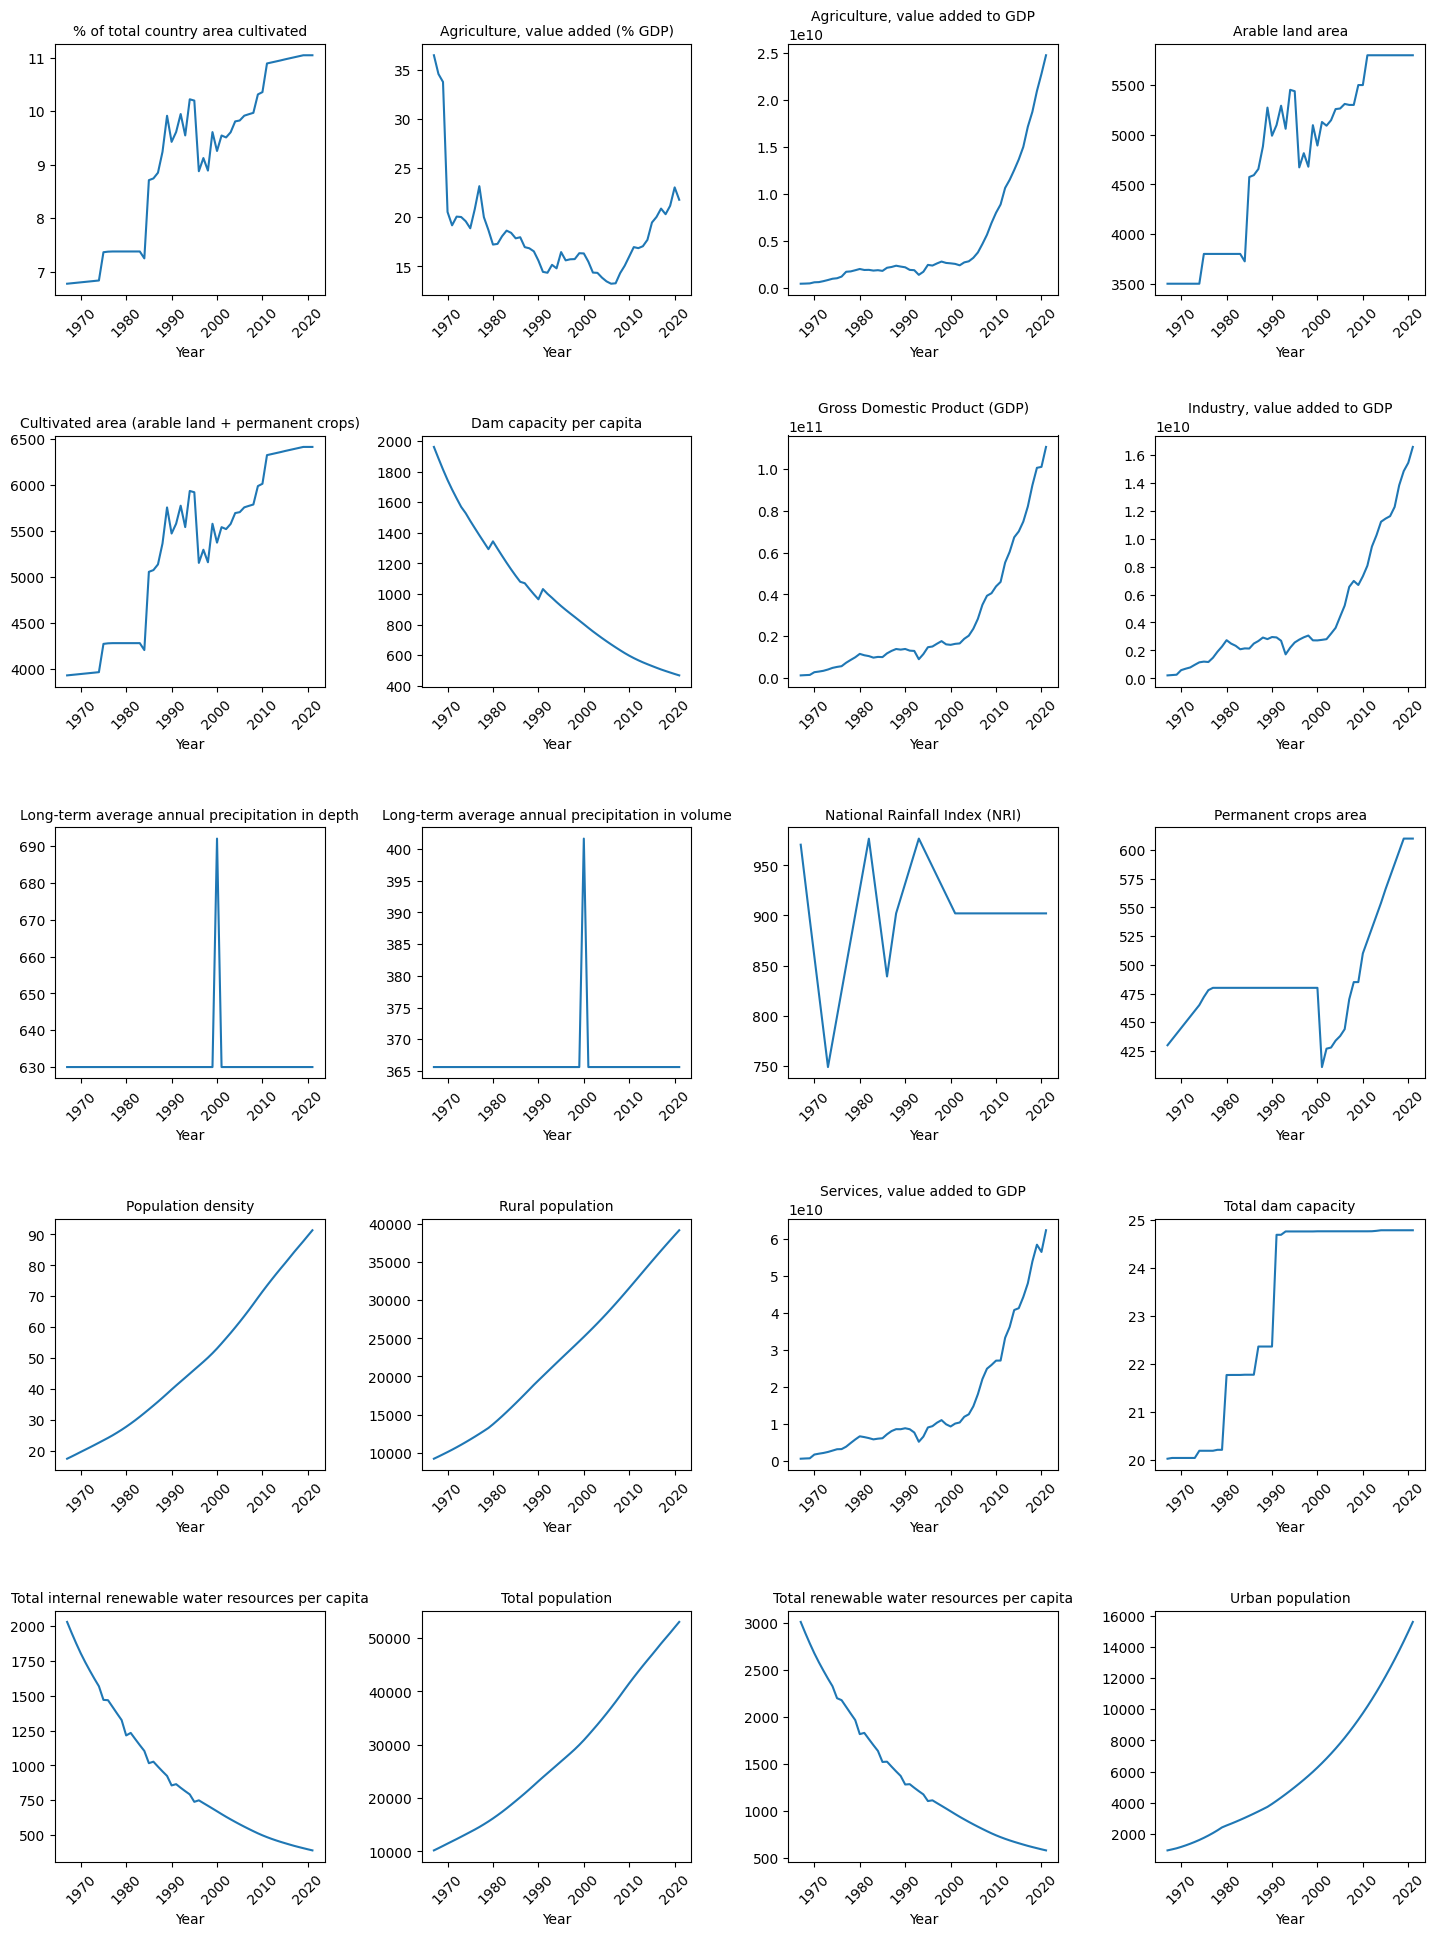

In [32]:
create_plots();